In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid')

import warnings 
warnings.filterwarnings('ignore')

### Data Cleaning

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df['loan_grade'].nunique()

7

In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
mean_imputer = SimpleImputer(strategy = 'mean')
df['person_emp_length'] = pd.DataFrame(mean_imputer.fit_transform(df[['person_emp_length']]))

In [9]:
mean_imputer = SimpleImputer(strategy = 'mean')
df['loan_int_rate'] = pd.DataFrame(mean_imputer.fit_transform(df[['loan_int_rate']]))

In [10]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Dealing with Outliers

In [11]:
# Uni-Variate Outliers
# Method - I (IQR Proximity Rule)
cols = ['person_age',
        'person_income', 
        'person_home_ownership',
        'person_emp_length', 'loan_intent',
        'loan_grade','loan_amnt', 
        'loan_int_rate', 'loan_status', 
        'loan_percent_income',
        'cb_person_default_on_file',
        'cb_person_cred_hist_length']

percentile_25 = df[cols].quantile(0.25)
percentile_75 = df[cols].quantile(0.75)
percentile_25

person_age                       23.00
person_income                 38500.00
person_emp_length                 2.00
loan_amnt                      5000.00
loan_int_rate                     8.49
loan_status                       0.00
loan_percent_income               0.09
cb_person_cred_hist_length        3.00
Name: 0.25, dtype: float64

In [12]:
percentile_75

person_age                       30.00
person_income                 79200.00
person_emp_length                 7.00
loan_amnt                     12200.00
loan_int_rate                    13.11
loan_status                       0.00
loan_percent_income               0.23
cb_person_cred_hist_length        8.00
Name: 0.75, dtype: float64

In [13]:
iqr = percentile_75-percentile_25
iqr

person_age                        7.00
person_income                 40700.00
person_emp_length                 5.00
loan_amnt                      7200.00
loan_int_rate                     4.62
loan_status                       0.00
loan_percent_income               0.14
cb_person_cred_hist_length        5.00
dtype: float64

In [14]:
#Defining Upper and Lower limits
upper_limit = percentile_75+1.5*iqr
lower_limit = percentile_25-1.5*iqr
upper_limit

person_age                        40.50
person_income                 140250.00
person_emp_length                 14.50
loan_amnt                      23000.00
loan_int_rate                     20.04
loan_status                        0.00
loan_percent_income                0.44
cb_person_cred_hist_length        15.50
dtype: float64

In [15]:
lower_limit

person_age                       12.50
person_income                -22550.00
person_emp_length                -5.50
loan_amnt                     -5800.00
loan_int_rate                     1.56
loan_status                       0.00
loan_percent_income              -0.12
cb_person_cred_hist_length       -4.50
dtype: float64

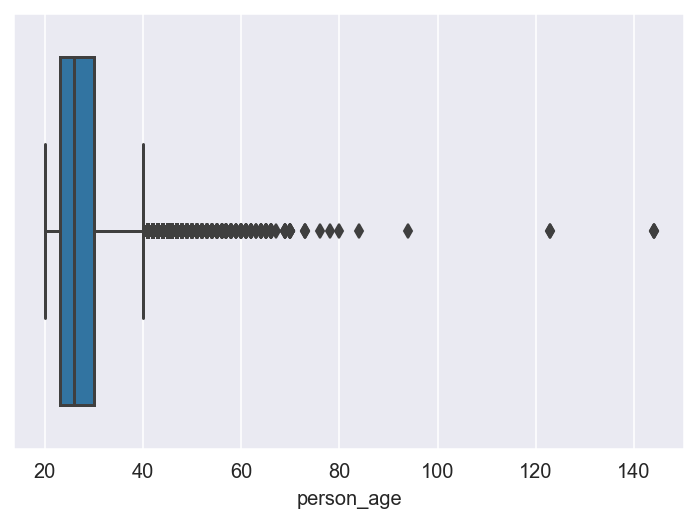

In [16]:
sns.boxplot(df.person_age)
plt.show()

In [17]:
#Outliers

df[df[cols]>upper_limit]
df[df[cols]<lower_limit]

IQR_outliers = df[(df[cols] <= lower_limit) | (df[cols] >= upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,NaN,NaN,NaN,123.0,NaN,NaN,35000.0,NaN,1,0.59,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.57,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,NaN,1,0.53,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,NaN,1,0.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,30.0
32577,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,19.0
32578,65.0,NaN,NaN,NaN,NaN,NaN,35000.0,NaN,1,0.46,NaN,28.0
32579,56.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,26.0


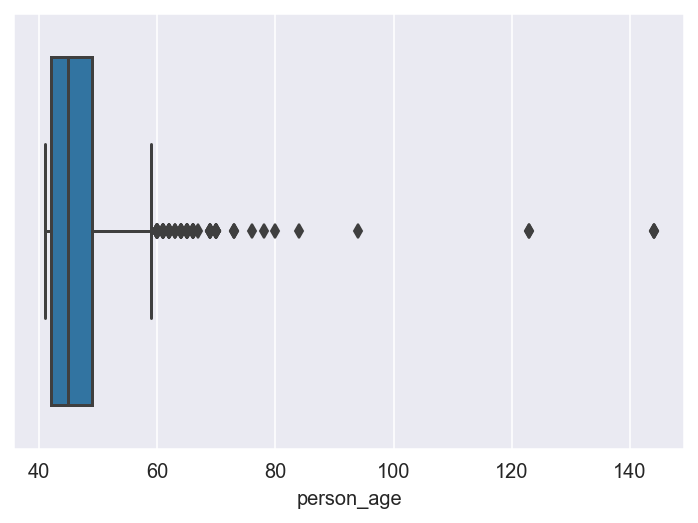

In [18]:
sns.boxplot(IQR_outliers.person_age)
plt.show()

In [19]:
#pip install feature-engine

In [20]:
from feature_engine.outliers import Winsorizer

In [21]:
win = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['person_age'])
df_t = win.fit_transform(df[['person_age']])

print(win.left_tail_caps_, win.right_tail_caps_)# min and max caps

{'person_age': 12.5} {'person_age': 40.5}


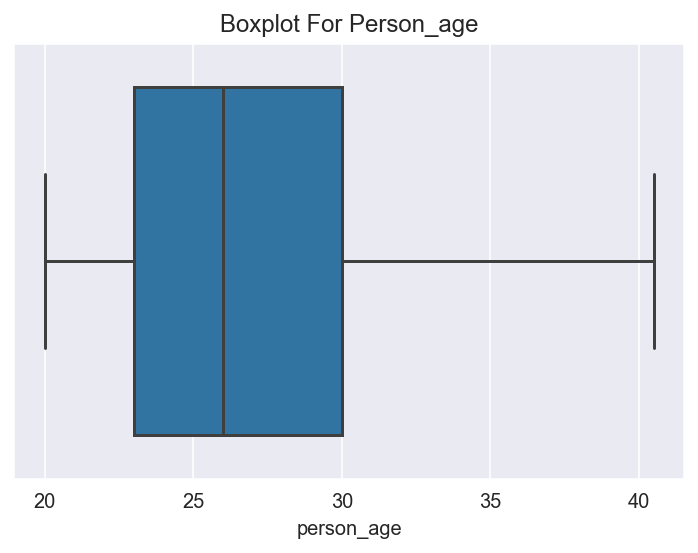

In [22]:
sns.boxplot(df_t.person_age)
plt.title('Boxplot For Person_age')
plt.show()

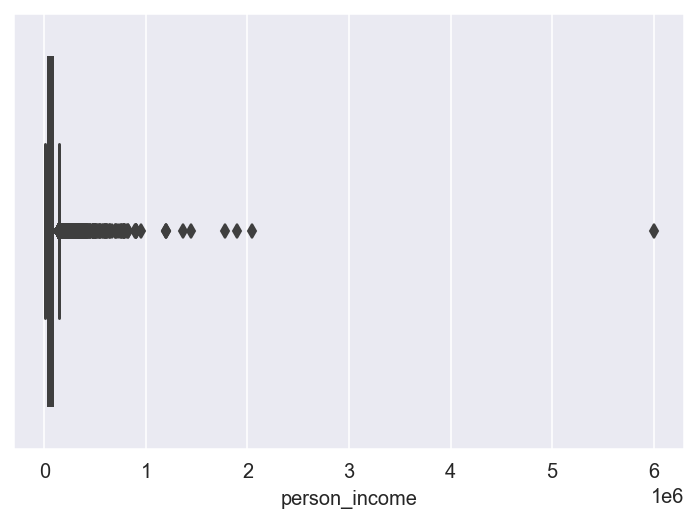

In [23]:
sns.boxplot(df.person_income)
plt.show()

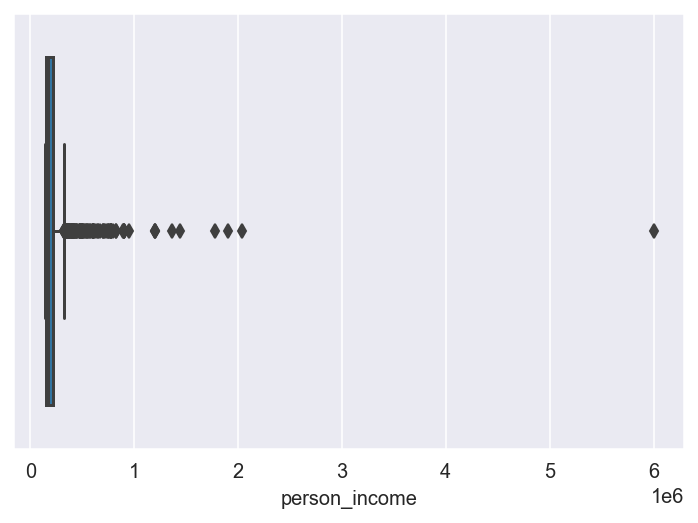

In [24]:
sns.boxplot(IQR_outliers.person_income)
plt.show()

In [25]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['person_income'])
df_t = win.fit_transform(df[['person_income']])

print(win.left_tail_caps_, win.right_tail_caps_)# min and max caps

{'person_income': -22550.0} {'person_income': 140250.0}


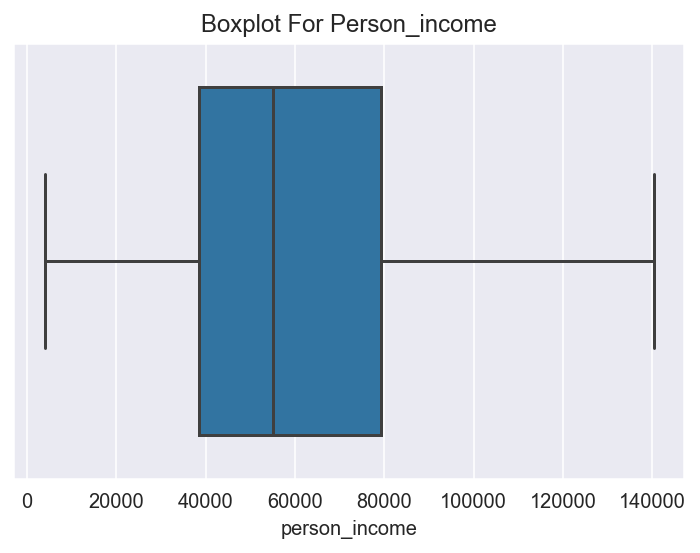

In [26]:
sns.boxplot(df_t.person_income)
plt.title('Boxplot For Person_income')
plt.show()

In [27]:
win = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['person_emp_length'])
df_t = win.fit_transform(df[['person_emp_length']])

print(win.left_tail_caps_, win.right_tail_caps_)# min and max caps

{'person_emp_length': -5.5} {'person_emp_length': 14.5}


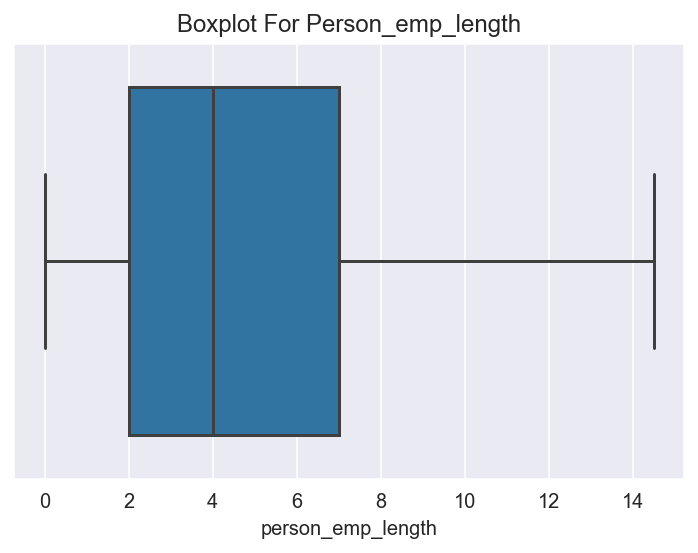

In [28]:
sns.boxplot(df_t.person_emp_length)
plt.title('Boxplot For Person_emp_length')
plt.show()

In [29]:
win = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['loan_amnt'])
df_t = win.fit_transform(df[['loan_amnt']])

print(win.left_tail_caps_, win.right_tail_caps_)# min and max caps

{'loan_amnt': -5800.0} {'loan_amnt': 23000.0}


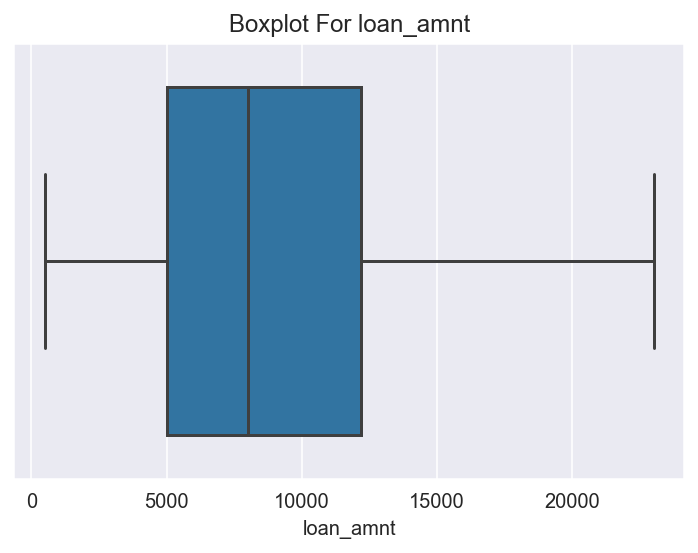

In [30]:
sns.boxplot(df_t.loan_amnt)
plt.title('Boxplot For loan_amnt')
plt.show()

In [31]:
win = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['loan_int_rate'])
df_t1 = win.fit_transform(df[['loan_int_rate']])

print(win.left_tail_caps_, win.right_tail_caps_)# min and max caps

{'loan_int_rate': 1.5600000000000014} {'loan_int_rate': 20.04}


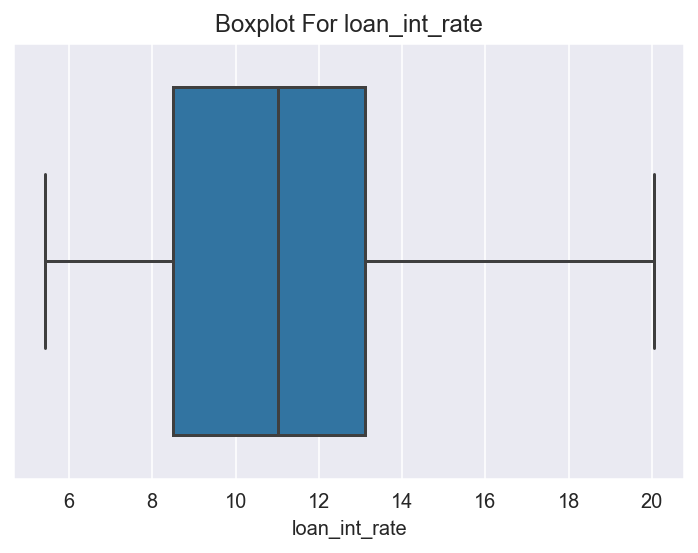

In [32]:
sns.boxplot(df_t1.loan_int_rate)
plt.title('Boxplot For loan_int_rate')
plt.show()

In [33]:
win = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['cb_person_cred_hist_length'])
df_t2 = win.fit_transform(df[['cb_person_cred_hist_length']])

print(win.left_tail_caps_, win.right_tail_caps_)# min and max caps

{'cb_person_cred_hist_length': -4.5} {'cb_person_cred_hist_length': 15.5}


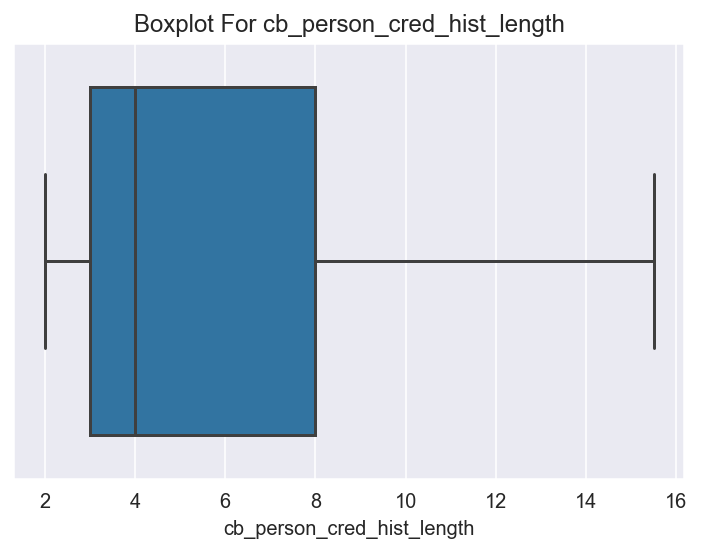

In [34]:
sns.boxplot(df_t2.cb_person_cred_hist_length)
plt.title('Boxplot For cb_person_cred_hist_length')
plt.show()

In [35]:
df = pd.read_csv('credit_risk_dataset.csv', skipinitialspace = True)  # parameter to remove whitespaces
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


In [36]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [37]:
d_2 = df['person_home_ownership'].replace(['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
                                   [0, 1, 2, 3], inplace = True)

In [38]:
win = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['person_home_ownership'])
df_2 = win.fit_transform(df[['person_home_ownership']])

print(win.left_tail_caps_, win.right_tail_caps_)# min and max caps

{'person_home_ownership': -3.0} {'person_home_ownership': 5.0}


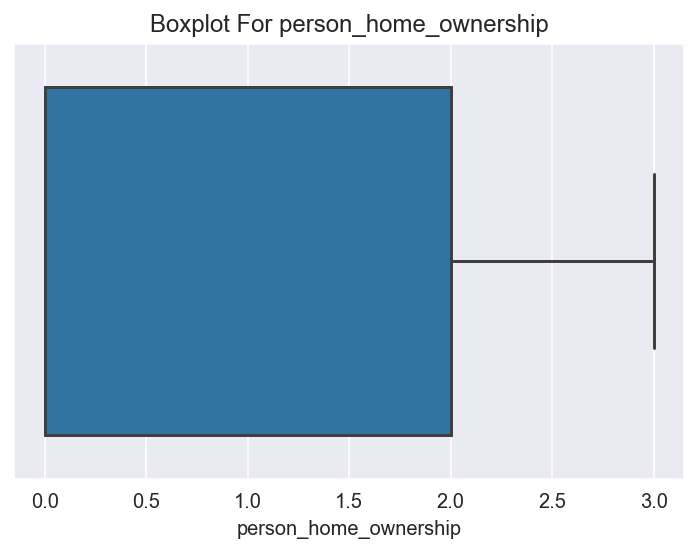

In [39]:
sns.boxplot(df_2.person_home_ownership)
plt.title('Boxplot For person_home_ownership')
plt.show()

### Dummies

In [40]:
pd.get_dummies(df['loan_intent'])

,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0,0,0,0,1,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
32576,0,0,0,0,1,0
32577,0,0,0,0,1,0
32578,0,0,1,0,0,0
32579,0,0,0,0,1,0


In [41]:
dummies = pd.get_dummies(df.loan_intent)
merged = pd.concat([df, dummies], axis = 'columns')
merged

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,0,1,0
1,21,9600,1,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,1,0,0,0,0
2,25,9600,2,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,0,0,1,0,0
3,23,65500,0,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0
4,24,54400,0,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0,0,0,0,1,0
32577,54,120000,2,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0,0,0,0,1,0
32578,65,76000,0,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0,0,1,0,0,0
32579,56,150000,2,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0,0,0,0,1,0


In [42]:
merged.drop('loan_intent', axis = 'columns', inplace = True)
merged

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,D,35000,16.02,1,0.59,Y,3,0,0,0,0,1,0
1,21,9600,1,5.0,B,1000,11.14,0,0.10,N,2,0,1,0,0,0,0
2,25,9600,2,1.0,C,5500,12.87,1,0.57,N,3,0,0,0,1,0,0
3,23,65500,0,4.0,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0
4,24,54400,0,8.0,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,C,5800,13.16,0,0.11,N,30,0,0,0,0,1,0
32577,54,120000,2,4.0,A,17625,7.49,0,0.15,N,19,0,0,0,0,1,0
32578,65,76000,0,3.0,B,35000,10.99,1,0.46,N,28,0,0,1,0,0,0
32579,56,150000,2,5.0,B,15000,11.48,0,0.10,N,26,0,0,0,0,1,0


In [43]:
merged.drop('VENTURE', axis = 'columns', inplace = True)
merged

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL
0,22,59000,0,123.0,D,35000,16.02,1,0.59,Y,3,0,0,0,0,1
1,21,9600,1,5.0,B,1000,11.14,0,0.10,N,2,0,1,0,0,0
2,25,9600,2,1.0,C,5500,12.87,1,0.57,N,3,0,0,0,1,0
3,23,65500,0,4.0,C,35000,15.23,1,0.53,N,2,0,0,0,1,0
4,24,54400,0,8.0,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,C,5800,13.16,0,0.11,N,30,0,0,0,0,1
32577,54,120000,2,4.0,A,17625,7.49,0,0.15,N,19,0,0,0,0,1
32578,65,76000,0,3.0,B,35000,10.99,1,0.46,N,28,0,0,1,0,0
32579,56,150000,2,5.0,B,15000,11.48,0,0.10,N,26,0,0,0,0,1


In [44]:
df_dum = pd.get_dummies(df['loan_intent'], drop_first = True)
df_dum = pd.concat([df,df_dum], axis = 'columns')
df_dum

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0
1,21,9600,1,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,1,0,0,0,0
2,25,9600,2,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,0,1,0,0
3,23,65500,0,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,1,0,0
4,24,54400,0,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0,0,0,1,0
32577,54,120000,2,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0,0,0,1,0
32578,65,76000,0,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0,1,0,0,0
32579,56,150000,2,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0,0,0,1,0


In [45]:
df_dum.drop(['loan_intent'], axis = 'columns', inplace = True)
df_dum

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0
1,21,9600,1,5.0,B,1000,11.14,0,0.10,N,2,1,0,0,0,0
2,25,9600,2,1.0,C,5500,12.87,1,0.57,N,3,0,0,1,0,0
3,23,65500,0,4.0,C,35000,15.23,1,0.53,N,2,0,0,1,0,0
4,24,54400,0,8.0,C,35000,14.27,1,0.55,Y,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,C,5800,13.16,0,0.11,N,30,0,0,0,1,0
32577,54,120000,2,4.0,A,17625,7.49,0,0.15,N,19,0,0,0,1,0
32578,65,76000,0,3.0,B,35000,10.99,1,0.46,N,28,0,1,0,0,0
32579,56,150000,2,5.0,B,15000,11.48,0,0.10,N,26,0,0,0,1,0


In [46]:
dummies = pd.get_dummies(df.cb_person_default_on_file)
dummies

,N,Y
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
32576,1,0
32577,1,0
32578,1,0
32579,1,0


In [47]:
df_dummies = pd.concat([df['cb_person_default_on_file'], df_dum], axis = 'columns')
df_dummies

,cb_person_default_on_file,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,Y,22,59000,0,123.0,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0
1,N,21,9600,1,5.0,B,1000,11.14,0,0.10,N,2,1,0,0,0,0
2,N,25,9600,2,1.0,C,5500,12.87,1,0.57,N,3,0,0,1,0,0
3,N,23,65500,0,4.0,C,35000,15.23,1,0.53,N,2,0,0,1,0,0
4,Y,24,54400,0,8.0,C,35000,14.27,1,0.55,Y,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,N,57,53000,2,1.0,C,5800,13.16,0,0.11,N,30,0,0,0,1,0
32577,N,54,120000,2,4.0,A,17625,7.49,0,0.15,N,19,0,0,0,1,0
32578,N,65,76000,0,3.0,B,35000,10.99,1,0.46,N,28,0,1,0,0,0
32579,N,56,150000,2,5.0,B,15000,11.48,0,0.10,N,26,0,0,0,1,0


In [48]:
df_dum_1 = df_dum['cb_person_default_on_file'].replace(['Y', 'N'], ['0', '1'], inplace = True)
df_dum_1

In [49]:
df_dum

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,D,35000,16.02,1,0.59,0,3,0,0,0,1,0
1,21,9600,1,5.0,B,1000,11.14,0,0.10,1,2,1,0,0,0,0
2,25,9600,2,1.0,C,5500,12.87,1,0.57,1,3,0,0,1,0,0
3,23,65500,0,4.0,C,35000,15.23,1,0.53,1,2,0,0,1,0,0
4,24,54400,0,8.0,C,35000,14.27,1,0.55,0,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,C,5800,13.16,0,0.11,1,30,0,0,0,1,0
32577,54,120000,2,4.0,A,17625,7.49,0,0.15,1,19,0,0,0,1,0
32578,65,76000,0,3.0,B,35000,10.99,1,0.46,1,28,0,1,0,0,0
32579,56,150000,2,5.0,B,15000,11.48,0,0.10,1,26,0,0,0,1,0


In [50]:
df_dum[df_dum['person_emp_length'].notnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,D,35000,16.02,1,0.59,0,3,0,0,0,1,0
1,21,9600,1,5.0,B,1000,11.14,0,0.10,1,2,1,0,0,0,0
2,25,9600,2,1.0,C,5500,12.87,1,0.57,1,3,0,0,1,0,0
3,23,65500,0,4.0,C,35000,15.23,1,0.53,1,2,0,0,1,0,0
4,24,54400,0,8.0,C,35000,14.27,1,0.55,0,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,C,5800,13.16,0,0.11,1,30,0,0,0,1,0
32577,54,120000,2,4.0,A,17625,7.49,0,0.15,1,19,0,0,0,1,0
32578,65,76000,0,3.0,B,35000,10.99,1,0.46,1,28,0,1,0,0,0
32579,56,150000,2,5.0,B,15000,11.48,0,0.10,1,26,0,0,0,1,0


In [51]:
df_dum.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
EDUCATION                        0
HOMEIMPROVEMENT                  0
MEDICAL                          0
PERSONAL                         0
VENTURE                          0
dtype: int64

In [52]:
mean_imputer = SimpleImputer(strategy = 'mean')
df_dum['person_emp_length'] = pd.DataFrame(mean_imputer.fit_transform(df_dum[['person_emp_length']]))

In [53]:
mean_imputer = SimpleImputer(strategy = 'mean')
df_dum['loan_int_rate'] = pd.DataFrame(mean_imputer.fit_transform(df_dum[['loan_int_rate']]))

In [54]:
df_dum.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
EDUCATION                     0
HOMEIMPROVEMENT               0
MEDICAL                       0
PERSONAL                      0
VENTURE                       0
dtype: int64

In [55]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [56]:
df['person_emp_length'].fillna(df.person_emp_length.median(), inplace = True)

In [57]:
df['person_emp_length'].isnull().sum()

0

In [58]:
df['loan_int_rate'].fillna(df.person_emp_length.median(), inplace = True)

In [59]:
df['loan_int_rate'].isnull().sum()

0

### X and y Split

In [60]:
X = df_dum.drop('loan_grade', axis = 1)
y = df_dum['loan_grade']
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,35000,16.02,1,0.59,0,3,0,0,0,1,0
1,21,9600,1,5.0,1000,11.14,0,0.10,1,2,1,0,0,0,0
2,25,9600,2,1.0,5500,12.87,1,0.57,1,3,0,0,1,0,0
3,23,65500,0,4.0,35000,15.23,1,0.53,1,2,0,0,1,0,0
4,24,54400,0,8.0,35000,14.27,1,0.55,0,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,5800,13.16,0,0.11,1,30,0,0,0,1,0
32577,54,120000,2,4.0,17625,7.49,0,0.15,1,19,0,0,0,1,0
32578,65,76000,0,3.0,35000,10.99,1,0.46,1,28,0,1,0,0,0
32579,56,150000,2,5.0,15000,11.48,0,0.10,1,26,0,0,0,1,0


In [61]:
y

0        D
1        B
2        C
3        C
4        C
        ..
32576    C
32577    A
32578    B
32579    B
32580    B
Name: loan_grade, Length: 32581, dtype: object

In [62]:
cols = ['person_age',
        'person_income', 
        'person_home_ownership',
        'person_emp_length',
        'loan_amnt', 
        'loan_int_rate', 'loan_status', 
        'loan_percent_income',
        'cb_person_default_on_file',
        'cb_person_cred_hist_length',
        'EDUCATION',
        'HOMEIMPROVEMENT',
        'MEDICAL',
        'PERSONAL',
        'VENTURE'
       ]

percentile_25 = df_dum[cols].quantile(0.25)
percentile_75 = df_dum[cols].quantile(0.75)
percentile_25

person_age                       23.00
person_income                 38500.00
person_home_ownership             0.00
person_emp_length                 2.00
loan_amnt                      5000.00
loan_int_rate                     8.49
loan_status                       0.00
loan_percent_income               0.09
cb_person_cred_hist_length        3.00
EDUCATION                         0.00
HOMEIMPROVEMENT                   0.00
MEDICAL                           0.00
PERSONAL                          0.00
VENTURE                           0.00
Name: 0.25, dtype: float64

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_dum.loan_grade = le.fit_transform(df_dum.loan_grade)
df_dum

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,3,35000,16.02,1,0.59,0,3,0,0,0,1,0
1,21,9600,1,5.0,1,1000,11.14,0,0.10,1,2,1,0,0,0,0
2,25,9600,2,1.0,2,5500,12.87,1,0.57,1,3,0,0,1,0,0
3,23,65500,0,4.0,2,35000,15.23,1,0.53,1,2,0,0,1,0,0
4,24,54400,0,8.0,2,35000,14.27,1,0.55,0,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,2,5800,13.16,0,0.11,1,30,0,0,0,1,0
32577,54,120000,2,4.0,0,17625,7.49,0,0.15,1,19,0,0,0,1,0
32578,65,76000,0,3.0,1,35000,10.99,1,0.46,1,28,0,1,0,0,0
32579,56,150000,2,5.0,1,15000,11.48,0,0.10,1,26,0,0,0,1,0


### Train Test Split

In [64]:
from sklearn.model_selection import train_test_split


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

### Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Modeling
##### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model = RandomForestClassifier('n_estimators': 90)
model.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [69]:
ypred_train = model.predict(scaled_X_train)
ypred_test = model.predict(scaled_X_test)

### Evaluation

In [70]:
from sklearn.metrics import accuracy_score
print('Train accuracy', accuracy_score(ypred_train, y_train))
print('Test accuracy', accuracy_score(ypred_test, y_test))

Train accuracy 1.0
Test accuracy 0.8674168797953964


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

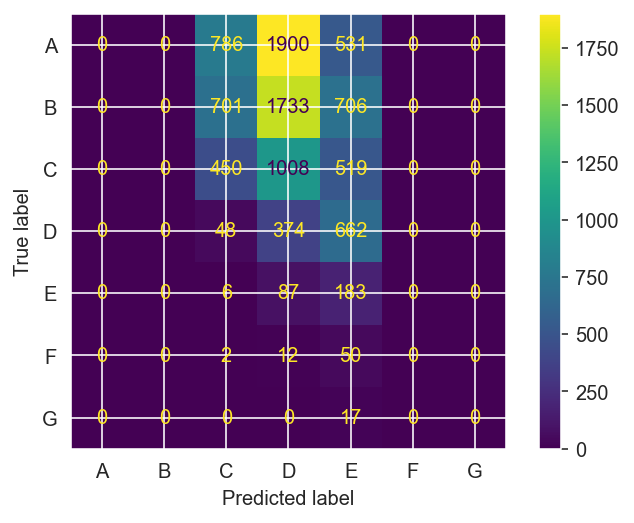

In [72]:
plot_confusion_matrix(model,X_test, y_test)
plt.show()

### Feature Importance

In [73]:
model.feature_importances_

array([0.0386546 , 0.05658178, 0.0126192 , 0.03727292, 0.05177674,
       0.57774286, 0.02576945, 0.04737673, 0.09049382, 0.03251693,
       0.00612318, 0.00491816, 0.00609241, 0.00603398, 0.00602721])

In [74]:
pd.DataFrame(index = X.columns,data = model.feature_importances_, columns = ['Feature Importance'])

,Feature Importance
person_age,0.038655
person_income,0.056582
person_home_ownership,0.012619
person_emp_length,0.037273
loan_amnt,0.051777
loan_int_rate,0.577743
loan_status,0.025769
loan_percent_income,0.047377
cb_person_default_on_file,0.090494
cb_person_cred_hist_length,0.032517


### Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
estimator = RandomForestClassifier()
param_grid = {'n_estimators':list(range(1, 101))}

In [77]:
grid = GridSearchCV(estimator,param_grid, scoring = 'accuracy', cv = 5)

In [78]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [79]:
grid.best_params_

{'n_estimators': 90}

In [80]:
ypred_train_1 = grid.predict(X_train)
ypred_test_1 = grid.predict(X_test)

### Evalution

In [81]:
print('train accuracy:', accuracy_score(ypred_train_1, y_train))
print('test accuracy:', accuracy_score(ypred_test_1, y_test))

train accuracy: 1.0
test accuracy: 0.8667007672634272


### XG-Boost Modeling

In [82]:
#pip install xgboost

In [83]:
df_dum

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,3,35000,16.02,1,0.59,0,3,0,0,0,1,0
1,21,9600,1,5.0,1,1000,11.14,0,0.10,1,2,1,0,0,0,0
2,25,9600,2,1.0,2,5500,12.87,1,0.57,1,3,0,0,1,0,0
3,23,65500,0,4.0,2,35000,15.23,1,0.53,1,2,0,0,1,0,0
4,24,54400,0,8.0,2,35000,14.27,1,0.55,0,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,2,5800,13.16,0,0.11,1,30,0,0,0,1,0
32577,54,120000,2,4.0,0,17625,7.49,0,0.15,1,19,0,0,0,1,0
32578,65,76000,0,3.0,1,35000,10.99,1,0.46,1,28,0,1,0,0,0
32579,56,150000,2,5.0,1,15000,11.48,0,0.10,1,26,0,0,0,1,0


In [84]:
df = df_dum.copy()
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,3,35000,16.02,1,0.59,0,3,0,0,0,1,0
1,21,9600,1,5.0,1,1000,11.14,0,0.10,1,2,1,0,0,0,0
2,25,9600,2,1.0,2,5500,12.87,1,0.57,1,3,0,0,1,0,0
3,23,65500,0,4.0,2,35000,15.23,1,0.53,1,2,0,0,1,0,0
4,24,54400,0,8.0,2,35000,14.27,1,0.55,0,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,2,5800,13.16,0,0.11,1,30,0,0,0,1,0
32577,54,120000,2,4.0,0,17625,7.49,0,0.15,1,19,0,0,0,1,0
32578,65,76000,0,3.0,1,35000,10.99,1,0.46,1,28,0,1,0,0,0
32579,56,150000,2,5.0,1,15000,11.48,0,0.10,1,26,0,0,0,1,0


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loan_grade = le.fit_transform(df.loan_grade)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,0,123.0,3,35000,16.02,1,0.59,0,3,0,0,0,1,0
1,21,9600,1,5.0,1,1000,11.14,0,0.10,1,2,1,0,0,0,0
2,25,9600,2,1.0,2,5500,12.87,1,0.57,1,3,0,0,1,0,0
3,23,65500,0,4.0,2,35000,15.23,1,0.53,1,2,0,0,1,0,0
4,24,54400,0,8.0,2,35000,14.27,1,0.55,0,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,2,5800,13.16,0,0.11,1,30,0,0,0,1,0
32577,54,120000,2,4.0,0,17625,7.49,0,0.15,1,19,0,0,0,1,0
32578,65,76000,0,3.0,1,35000,10.99,1,0.46,1,28,0,1,0,0,0
32579,56,150000,2,5.0,1,15000,11.48,0,0.10,1,26,0,0,0,1,0


### X and y Split

In [86]:
X = pd.get_dummies(df.drop('loan_grade', axis = 1))
y = df['loan_grade']

In [87]:
y

0        3
1        1
2        2
3        2
4        2
        ..
32576    2
32577    0
32578    1
32579    1
32580    1
Name: loan_grade, Length: 32581, dtype: int64

### Train Test Split

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test  = scaler.transform(X_test)

In [90]:
from xgboost import XGBClassifier

In [91]:
xgb_model = XGBClassifier()

In [92]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [93]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9837761992458125
0.9341176470588235


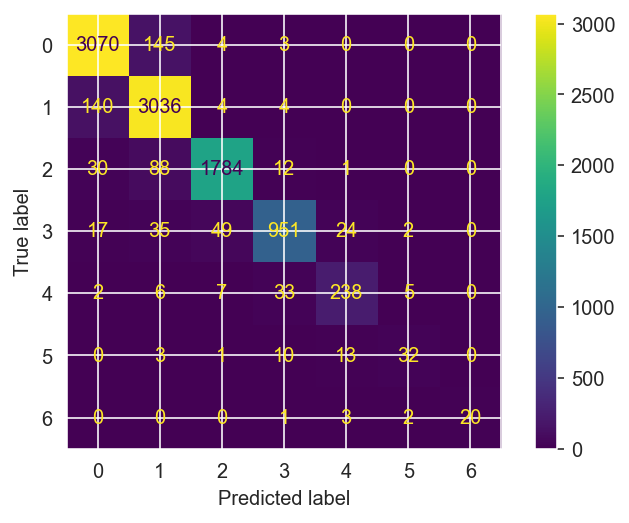

In [95]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(xgb_model,X_test,y_test))

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3222
           1       0.92      0.95      0.93      3184
           2       0.96      0.93      0.95      1915
           3       0.94      0.88      0.91      1078
           4       0.85      0.82      0.84       291
           5       0.78      0.54      0.64        59
           6       1.00      0.77      0.87        26

    accuracy                           0.93      9775
   macro avg       0.91      0.84      0.87      9775
weighted avg       0.93      0.93      0.93      9775



### Hyper Parameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier()
param_grid = {'n_estimators':[1,5,10,20,40,100],'max_depth':[3,4,5,6],'gamma':[0,1]}

In [98]:
grid = GridSearchCV(xgb_model,param_grid, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [0, 1], 'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]},
             scoring='accuracy')

In [99]:
grid.best_params_

{'gamma': 0, 'max_depth': 6, 'n_estimators': 100}

In [100]:
prediction = grid.predict(X_train)
predictions = grid.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, prediction))
print("Test Accuracy:", accuracy_score(y_test, predictions))

Train Accuracy: 0.9837761992458125
Test Accuracy: 0.9341176470588235


In [101]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3222
           1       0.92      0.95      0.93      3184
           2       0.96      0.93      0.95      1915
           3       0.94      0.88      0.91      1078
           4       0.85      0.82      0.84       291
           5       0.78      0.54      0.64        59
           6       1.00      0.77      0.87        26

    accuracy                           0.93      9775
   macro avg       0.91      0.84      0.87      9775
weighted avg       0.93      0.93      0.93      9775



### Feature Importance

In [102]:
grid.best_estimator_.feature_importances_

imp_feats = pd.DataFrame(index = X.columns,data = grid.best_estimator_.feature_importances_, columns = ['Importance'])
imp_feats

,Importance
person_age,0.011115
person_income,0.013369
person_home_ownership,0.016090
person_emp_length,0.013549
loan_amnt,0.014647
loan_int_rate,0.401567
loan_status,0.047752
loan_percent_income,0.012694
cb_person_cred_hist_length,0.011511
EDUCATION,0.012551


In [103]:
imp_feats.sort_values('Importance', ascending = False)

,Importance
loan_int_rate,0.401567
cb_person_default_on_file_0,0.391048
loan_status,0.047752
MEDICAL,0.018894
person_home_ownership,0.016090
loan_amnt,0.014647
person_emp_length,0.013549
person_income,0.013369
loan_percent_income,0.012694
HOMEIMPROVEMENT,0.012683


In [104]:
imp_feats.describe()

,Importance
count,16.000000
mean,0.062500
std,0.130675
min,0.000000
25%,0.011601
50%,0.013032
75%,0.016791
max,0.401567


In [105]:
imp_feats = imp_feats[imp_feats['Importance']>0.000527]

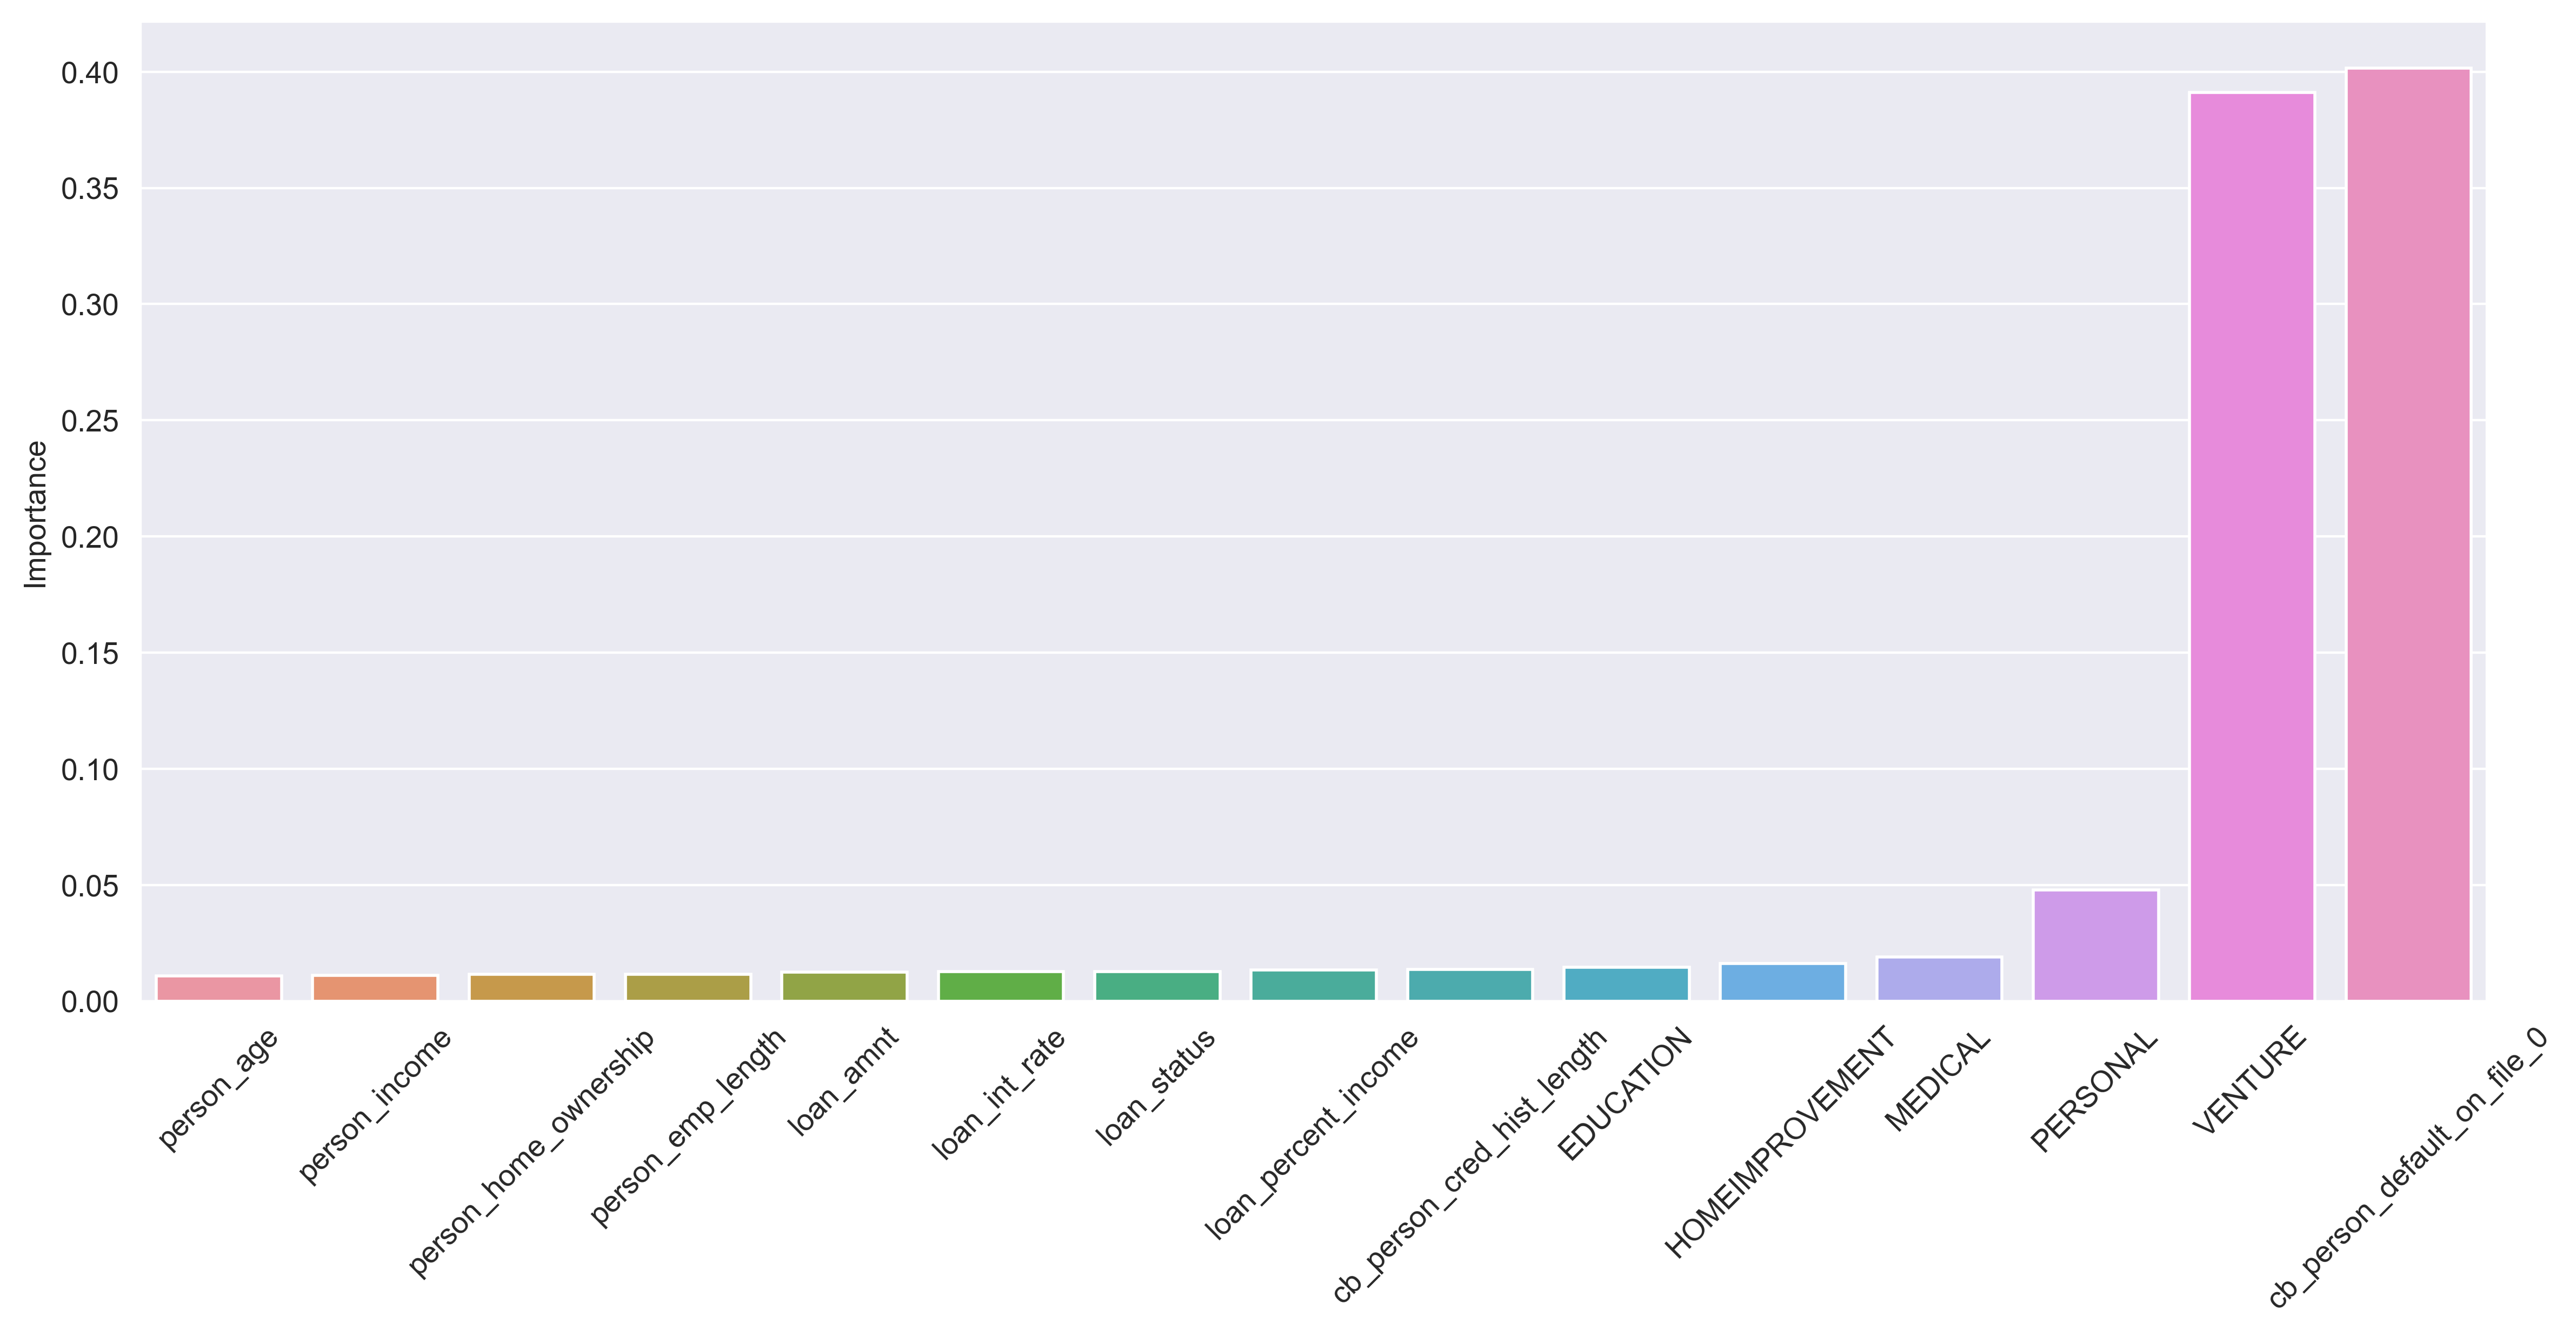

In [106]:
plt.figure(figsize = (14,6), dpi = 200)
sns.barplot(data = imp_feats.sort_values('Importance'),x=imp_feats.index,y = 'Importance')
plt.xticks(rotation = 45);